## Lab 9
### Arsalan Shoaib Patel - 8865064

In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import fashion_mnist as fmnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix



* Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

In [2]:
# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')


Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


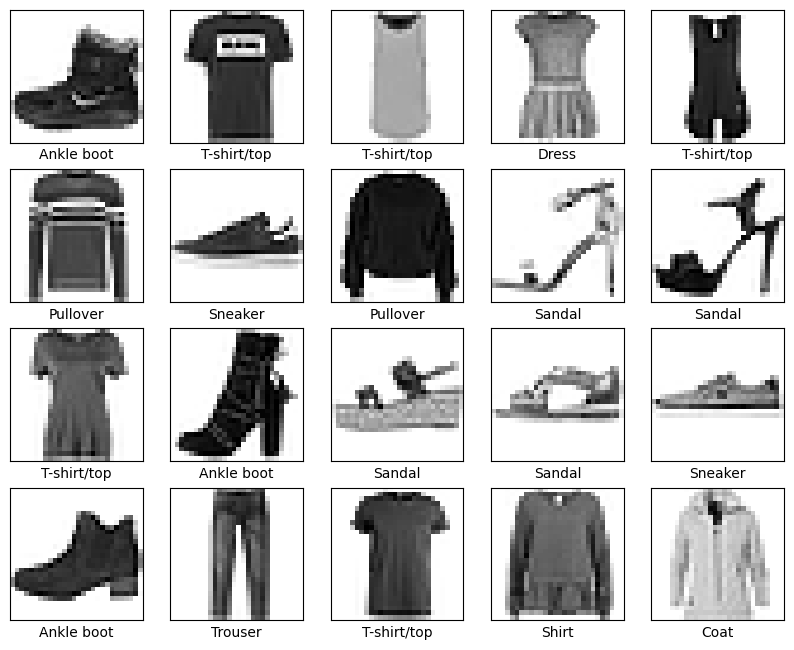

In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

* Train a dense neural network using Keras, try out at least three hyperparameters configurations

In [4]:
# Normalize values of the pixels
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Flattening the images
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

In [9]:
#hyperparamter 1
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

#hyperparameter2
model2 = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)), 
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

#hyperparameter3
model3 = Sequential([
    Dense(256, activation='relu', input_shape=(784,)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5206 - accuracy: 0.8190 - val_loss: 0.4018 - val_accuracy: 0.8608
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3870 - accuracy: 0.8612 - val_loss: 0.3679 - val_accuracy: 0.8698
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3449 - accuracy: 0.8742 - val_loss: 0.3599 - val_accuracy: 0.8728
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3233 - accuracy: 0.8813 - val_loss: 0.3463 - val_accuracy: 0.8757
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3020 - accuracy: 0.8885 - val_loss: 0.3759 - val_accuracy: 0.8640
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2849 - accuracy: 0.8944 - val_loss: 0.3304 - val_accuracy: 0.8800
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2753 - accuracy: 0.8976 - val_loss: 0.3185 - val_accuracy:

* Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration

In [10]:
# Evaluating every model
model1_loss, model1_accuracy = model1.evaluate(test_images, test_labels) #model1
model2_loss, model2_accuracy = model2.evaluate(test_images, test_labels) #model2
model3_loss, model3_accuracy = model3.evaluate(test_images, test_labels) #model3

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8828


Model 3 had the best accuracy

In [14]:
pred = model3.predict(test_images)
pred_classes = np.argmax(pred, axis=1)
ConfusionMat = confusion_matrix(test_labels, pred_classes)
ConfusionMat

313/313 [==============================] - 1s 2ms/step


array([[861,   2,  11,  21,   4,   0,  92,   0,   9,   0],
       [  2, 975,   3,  13,   3,   0,   3,   0,   1,   0],
       [ 15,   0, 824,  12,  95,   0,  54,   0,   0,   0],
       [ 20,  19,  12, 885,  31,   0,  29,   0,   4,   0],
       [  1,   0, 109,  33, 827,   0,  30,   0,   0,   0],
       [  0,   0,   0,   0,   0, 943,   0,  26,   1,  30],
       [128,   1,  98,  29, 109,   0, 628,   0,   7,   0],
       [  0,   0,   0,   0,   0,  13,   0, 956,   0,  31],
       [  3,   1,   8,   6,   5,   2,   6,   3, 966,   0],
       [  0,   0,   0,   0,   0,   4,   1,  32,   0, 963]], dtype=int64)

List of incorrect indices: [  12   17   23 ... 9972 9977 9979]


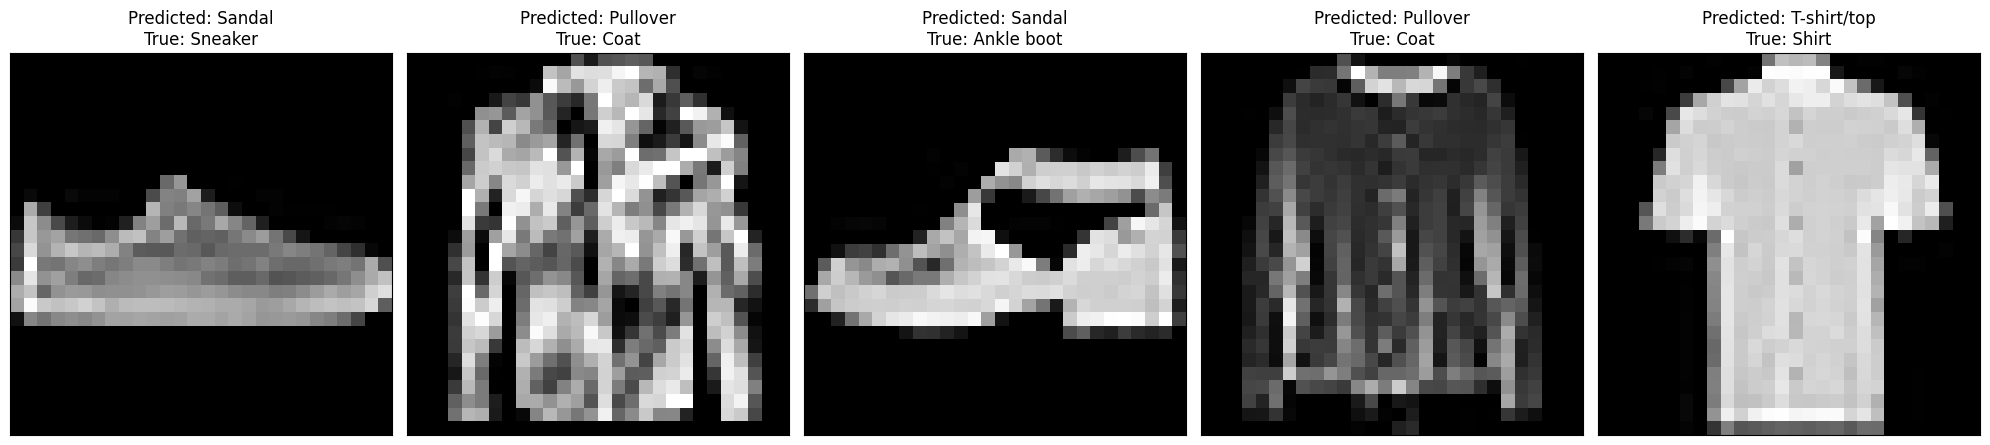

In [33]:
# Find the indices of the incorrect predictions
incorrect= np.where(pred_classes != test_labels)[0]
print(f"List of incorrect indices: {incorrect}")
plt.figure(figsize=(20, 5))
for i in range(5):
    idx = incorrect[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {classes[pred_classes[idx]]}\nTrue: {classes[test_labels[idx]]}")
    plt.xticks([]) 
    plt.yticks([])  
plt.tight_layout()
plt.show()


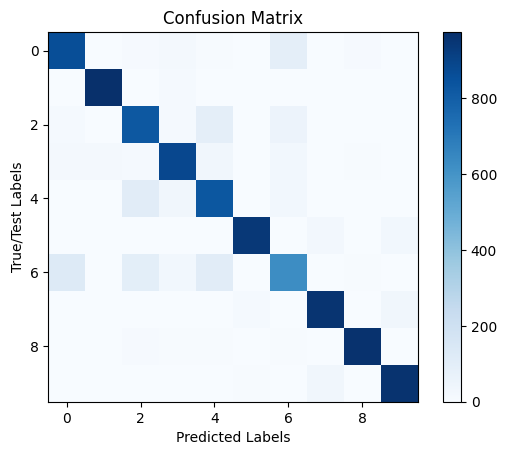

In [32]:
plt.imshow(ConfusionMat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True/Test Labels')
plt.xlabel('Predicted Labels')
plt.show()

According to the plots:
* The model is not be learning enough discriminative features for each class and confuses classes with similar shapes, such as sneakers and sandals, or coats and pullovers.
* A more complex model might be better with more epochs and data